In [5]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel('basic_data.xlsx')

In [2]:
# referees with highest number of fights

df['ref'].value_counts().head(10)

Herb Dean           858
John McCarthy       640
Dan Miragliotta     400
Mario Yamasaki      392
Marc Goddard        346
Yves Lavigne        264
Steve Mazzagatti    201
Leon Roberts        192
Keith Peterson      189
Jason Herzog        178
Name: ref, dtype: int64

In [3]:
# types of stoppages for particular ref
# Prompt the user to enter the name of the referee
ref_name = input("Enter the name of the referee: ")

# Filter the data to only include rows where the 'ref' column matches the entered name
filtered_df = df[df['ref'] == ref_name]

# Group the data by the 'win_by' column and count the occurrences of each value
counts = filtered_df.groupby('win_by')['win_by'].count()

# Print the overall occurrence of the referee in the 'ref' column
print(f"Overall fights of {ref_name}: {len(filtered_df)} before 21/03/2001")

# Print the number of occurrences of each value in the 'win_by' column
print(counts)

Overall fights of Herb Dean: 858 before 21/03/2001
win_by
Could Not Continue           6
Decision - Majority          5
Decision - Split            78
Decision - Unanimous       279
KO/TKO                     299
Overturned                   5
Submission                 179
TKO - Doctor's Stoppage      7
Name: win_by, dtype: int64


In [4]:
#added percentage

# Prompt the user to enter the name of the referee
ref_name = input("Enter the name of the referee: ")

# Filter the data to only include rows where the 'ref' column matches the entered name
filtered_df = df[df['ref'] == ref_name]

# Group the data by the 'win_by' column and count the occurrences of each value
counts = filtered_df.groupby('win_by')['win_by'].count()

# Calculate the percentage of each value relative to the total number of occurrences
percentages = counts / len(filtered_df) * 100

# Print the overall occurrence of the referee in the 'ref' column
print(f"Overall occurrence of {ref_name}: {len(filtered_df)}")

# Print the number and percentage of occurrences of each value in the 'win_by' column
for win_by, count in counts.iteritems():
    percentage = percentages[win_by]
    print(f"{win_by}: {count} ({percentage:.2f}%)")


Overall occurrence of Herb Dean: 858
Could Not Continue: 6 (0.70%)
Decision - Majority: 5 (0.58%)
Decision - Split: 78 (9.09%)
Decision - Unanimous: 279 (32.52%)
KO/TKO: 299 (34.85%)
Overturned: 5 (0.58%)
Submission: 179 (20.86%)
TKO - Doctor's Stoppage: 7 (0.82%)


In [8]:
#Creating a table of stats for top 10 refs
# Group the data by the 'ref' column and count the number of occurrences of each value
ref_counts = df['ref'].value_counts()

# Get the top 10 most frequent referees
top_refs = ref_counts.head(10)

# Initialize an empty list to store the rows of the results DataFrame
results_rows = []

# Loop through the top referees
for ref_name in top_refs.index:
    # Filter the data to only include rows where the 'ref' column matches the current referee
    filtered_df = df[df['ref'] == ref_name]

    # Group the data by the 'win_by' column and count the occurrences of each value
    counts = filtered_df.groupby('win_by')['win_by'].count()

    # Calculate the percentage of each value relative to the total number of occurrences
    percentages = counts / len(filtered_df) * 100

    # Loop through the win_by values and add a row for each one to the results list
    for win_by in counts.index:
        count = counts[win_by]
        percentage = percentages[win_by]
        results_rows.append({'ref': ref_name, 'win_by': win_by, 'count': count, 'percentage': percentage})

# Create a new DataFrame with the results rows
results_df = pd.DataFrame(results_rows)

# Save the DataFrame to an Excel file
results_df.to_excel('refs_finis_stats.xlsx', index=False)

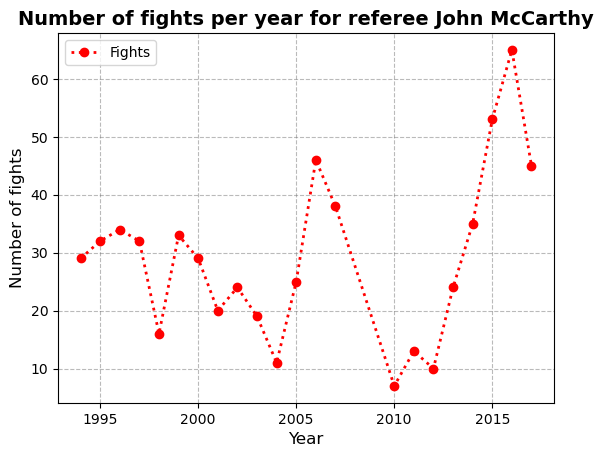

In [9]:
#Creating a visualisation of fights for a selected referee through the years
# Load the data into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Select the rows with the specified ref
filtered_df = df[df['ref'] == 'John McCarthy']

# Group the data by the 'year' column and count the number of occurrences of each value
counts = filtered_df.groupby('year')['ref'].count()

# Plot the data as a line chart
plt.plot(counts.index, counts.values, color='red', linestyle='dotted', marker='o', markersize=6, linewidth=2)

# Add a title and axis labels
plt.title('Number of fights per year for referee John McCarthy', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of fights', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', color='#777777', alpha=0.5)

# Add a legend
plt.legend(['Fights'])

# Set the background color
plt.rcParams['figure.facecolor'] = 'lightblue'

# Show the plot
plt.show()



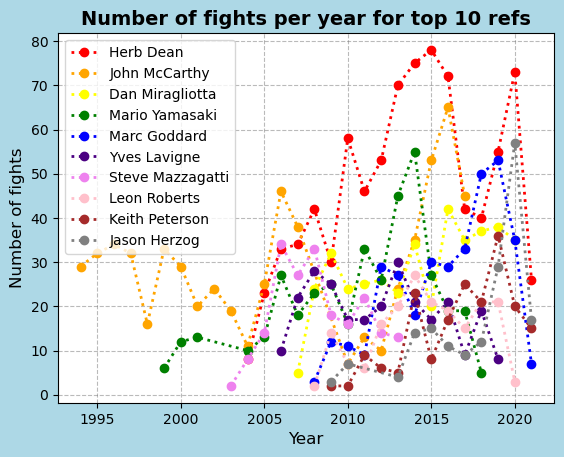

In [10]:
# Creating a visualisation concerning all top ten referees

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Group the data by the 'ref' and 'year' columns and count the number of occurrences of each value
counts = df.groupby(['ref', 'year'])['ref'].count()

# Select the top 10 refs based on the number of occurrences (i.e., the count)
top_10_refs = df['ref'].value_counts().head(10).index.tolist()

# Create a list of colors for the refs
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown', 'gray']

# Iterate over the top 10 refs and plot their data
for ref, color in zip(top_10_refs, colors):
    # Select the rows with the current ref
    ref_df = counts[counts.index.get_level_values(0) == ref]

    # Plot the data as a line chart
    plt.plot(ref_df.index.get_level_values(1), ref_df.values, color=color, linestyle='dotted', marker='o', markersize=6, linewidth=2)

# Add a title and axis labels
plt.title('Number of fights per year for top 10 refs', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of fights', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', color='#777777', alpha=0.5)

# Add a legend
plt.legend(top_10_refs)

# Set the background color


# Set the background color
plt.rcParams['figure.facecolor'] = 'lightblue'

# Show the plot
plt.show()


In [11]:
# creating a table from selected refs data
counts.to_excel('ref_counts.xlsx', sheet_name='Ref counts', index=True, encoding='utf-8')